# 4.3 K-means

### Miguel Ángel Jiménez Cuadrillero
### 2020

*OBJETIVO*: Descubrir si hay grupos dentro de los datos, es decir, una agrupación coherente en los datos.


Para realizar un análisis de cluster en Python, generalmente, los datos deben prepararse de la siguiente manera:

Las filas son observaciones (individuos) y las columnas son variables
Cualquier valor que falte en los datos debe eliminarse o estimarse.
Los datos deben estar estandarizados (es decir, escalados) para que las variables sean comparables. La estandarización consiste en transformar las variables de tal manera que tengan media cero y desviación estándar uno.
Usaremos el conjunto de datos R integrado “USArrests”, que contiene estadísticas sobre arrestos por cada 100,000 residentes por asalto, asesinato y violación en cada uno de los 50 estados de EE. UU. en 1973.

Incluye también el porcentaje de la población que vive en áreas urbanas.

In [22]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
from sklearn.model_selection import train_test_split
plt.figure(figsize=(20,5))

random_state = 123

from sklearn import datasets

<Figure size 1440x360 with 0 Axes>

In [23]:
df = pd.read_csv("./datasets/USArrests.csv", sep=',')

cor = df.corr(method='pearson')
print(cor)

            Murder   Assault  UrbanPop      Rape
Murder    1.000000  0.801873  0.069573  0.563579
Assault   0.801873  1.000000  0.258872  0.665241
UrbanPop  0.069573  0.258872  1.000000  0.411341
Rape      0.563579  0.665241  0.411341  1.000000


In [24]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [25]:
df.tail()

,State,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [26]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


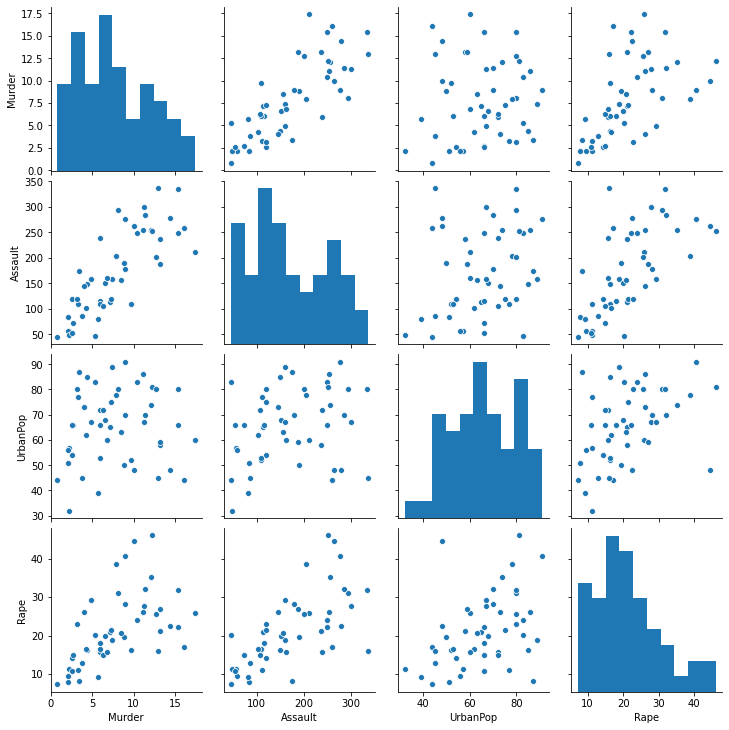

In [27]:
sns.pairplot(df)

In [28]:
from sklearn.preprocessing import StandardScaler

scaled_features = df.copy()


numeric_col_names = ["Murder","Assault","UrbanPop","Rape"]
features = scaled_features[numeric_col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

df[col_names] = features

print(df)

             State    Murder   Assault  UrbanPop      Rape
0          Alabama  1.255179  0.790787 -0.526195 -0.003451
1           Alaska  0.513019  1.118060 -1.224067  2.509424
2          Arizona  0.072361  1.493817  1.009122  1.053466
3         Arkansas  0.234708  0.233212 -1.084492 -0.186794
4       California  0.281093  1.275635  1.776781  2.088814
5         Colorado  0.025976  0.402909  0.869548  1.883901
6      Connecticut -1.040880 -0.736484  0.799761 -1.092723
7         Delaware -0.437875  0.815030  0.450825 -0.585834
8          Florida  1.765415  1.990786  1.009122  1.150530
9          Georgia  2.229265  0.487757 -0.386621  0.492653
10          Hawaii -0.577030 -1.512241  1.218484 -0.111300
11           Idaho -1.203228 -0.615272 -0.805344 -0.758392
12        Illinois  0.605789  0.948363  1.218484  0.298525
13         Indiana -0.136372 -0.700121 -0.037685 -0.025021
14            Iowa -1.295998 -1.391029 -0.595982 -1.071153
15          Kansas -0.414682 -0.675878  0.032102 -0.3485

In [18]:
df = df.dropna()

In [29]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df[numeric_col_names])
    Sum_of_squared_distances.append(km.inertia_)

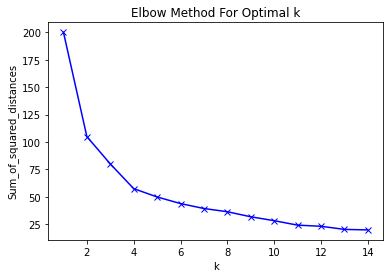

In [30]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [33]:
km = KMeans(n_clusters=4)
km = km.fit(df[numeric_col_names])
km.__dict__

{'n_clusters': 4,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'precompute_distances': 'deprecated',
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'n_jobs': 'deprecated',
 'algorithm': 'auto',
 '_n_threads': 4,
 'n_features_in_': 4,
 'cluster_centers_': array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
        [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
        [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
        [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]]),
 'labels_': array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
        2, 1, 3, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
        2, 0, 0, 2, 2, 0]),
 'inertia_': 57.55425863091106,
 'n_iter_': 6}